# 背景信息

多年以来电子商务业务快速发展，尤其是移动客户端发展迅猛，移动互联网时代的到来让原本就方便快捷的网上购物变得更加便利。

但随着互联网人口红利的消失，利用大数据分析深入地了解用户、进行精准化运营变得越来越重要，**用户行为分析**可以让产品更加详细、清楚地了解用户的行为习惯，从而找出网站、APP、推广渠道等存在的问题，更好的提高业务转化率。

京东作为国内知名的电商交易平台，具有巨大的流量优势。本案例提供的**订单消费数据**为分析对象，结合实际业务和应用场景，从不同维度和指标展开分析，探索电子商务平台的用户消费行为特点，**构建用户分群 RFM 模型，总结用户消费行为特点并提出营销建议**。


# Part 1 数据导入及数据清洗与整理

1. 数据导入及清洗
2. 数据整理

## Step 1 数据导入及清洗

In [274]:
# 导入所需要的库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 数据文件路径
path = './课程素材/all_data(1).csv'

# 读取京东电商销售数据集,代码需补充👇
df = pd.read_csv(path, encoding='utf-8')
df.head()

,订单号,顾客ID,订单时间,付款金额,商品ID,商品描述
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017/10/2 10:56,18.12,87285b34884572647811a353c7ac498a,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017/10/2 10:56,2.00,87285b34884572647811a353c7ac498a,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017/10/2 10:56,18.59,87285b34884572647811a353c7ac498a,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017/8/15 18:29,37.77,87285b34884572647811a353c7ac498a,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017/8/2 18:24,37.77,87285b34884572647811a353c7ac498a,housewares


In [275]:
# 查看数据集基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115878 entries, 0 to 115877
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单号     115878 non-null  object 
 1   顾客ID    115878 non-null  object 
 2   订单时间    115878 non-null  object 
 3   付款金额    115878 non-null  float64
 4   商品ID    115878 non-null  object 
 5   商品描述    115878 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [276]:
# 查看缺失值
df.isnull().sum()


订单号     0
顾客ID    0
订单时间    0
付款金额    0
商品ID    0
商品描述    0
dtype: int64

In [277]:
# 查看重复值
df.duplicated().sum()


11039

In [278]:
# 删除重复值
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104839 entries, 0 to 115877
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单号     104839 non-null  object 
 1   顾客ID    104839 non-null  object 
 2   订单时间    104839 non-null  object 
 3   付款金额    104839 non-null  float64
 4   商品ID    104839 non-null  object 
 5   商品描述    104839 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.6+ MB


In [279]:
# 查看数据描述性统计信息
df.describe()

,付款金额
count,104839.000000
mean,158.264636
std,218.993424
min,0.000000
25%,58.370000
50%,102.850000
75%,177.320000
max,13664.080000


In [280]:
# 剔除'付款金额'为 0 的异常值
df = df[df['付款金额'] > 0]
df.describe()

,付款金额
count,104834.000000
mean,158.272184
std,218.995919
min,0.010000
25%,58.370000
50%,102.850000
75%,177.320000
max,13664.080000


In [281]:
# 保存清理干净的数据为clean_data.csv
df.to_csv('./课程素材/clean_data(1).csv')

## Step 2 数据整理

In [282]:
# 将'订单时间'字段转换为日期格式
df['订单时间'] = df['订单时间'].astype('datetime64')
df


,订单号,顾客ID,订单时间,付款金额,商品ID,商品描述
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,18.12,87285b34884572647811a353c7ac498a,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,2.00,87285b34884572647811a353c7ac498a,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,18.59,87285b34884572647811a353c7ac498a,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:00,37.77,87285b34884572647811a353c7ac498a,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:00,37.77,87285b34884572647811a353c7ac498a,housewares
...,...,...,...,...,...,...
115873,0b82d0616f1ad8da15cf967b984b4004,986632b40c38f4240caf8608cb01d40d,2018-08-03 21:35:00,33.69,4a24717893a6c8f3cfcf9843b8987d15,arts_and_craftmanship
115874,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:00,84.63,9c313adb4b38a55b092f53f83f78be9e,arts_and_craftmanship
115875,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:00,84.63,eacb104882d39ffb53140b1d1860a7c3,arts_and_craftmanship
115876,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,2017-01-26 11:09:00,209.06,6c7a0a349ad11817745e3ad58abd5c79,security_and_services


In [283]:
# 新增'年份'、'月份'、'日期'字段
df['年份']=df['订单时间'].dt.year
df['月份']=df['订单时间'].dt.month
df['星期几']=df['订单时间'].dt.weekday
df

,订单号,顾客ID,订单时间,付款金额,商品ID,商品描述,年份,月份,星期几
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,18.12,87285b34884572647811a353c7ac498a,housewares,2017,10,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,2.00,87285b34884572647811a353c7ac498a,housewares,2017,10,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,18.59,87285b34884572647811a353c7ac498a,housewares,2017,10,0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:00,37.77,87285b34884572647811a353c7ac498a,housewares,2017,8,1
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:00,37.77,87285b34884572647811a353c7ac498a,housewares,2017,8,2
...,...,...,...,...,...,...,...,...,...
115873,0b82d0616f1ad8da15cf967b984b4004,986632b40c38f4240caf8608cb01d40d,2018-08-03 21:35:00,33.69,4a24717893a6c8f3cfcf9843b8987d15,arts_and_craftmanship,2018,8,4
115874,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:00,84.63,9c313adb4b38a55b092f53f83f78be9e,arts_and_craftmanship,2018,7,0
115875,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:00,84.63,eacb104882d39ffb53140b1d1860a7c3,arts_and_craftmanship,2018,7,0
115876,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,2017-01-26 11:09:00,209.06,6c7a0a349ad11817745e3ad58abd5c79,security_and_services,2017,1,3


# Part 2 每月消费趋势分析

> 主要针对消费金额、消费顾客数、订单数以及商品购买量四个指标，分析 2017-2018 年每个月这四个指标的变化趋势。

1. 消费金额分析
2. 消费顾客数分析
3. 订单数分析
4. 商品购买量分析

## Step 1 消费金额分析

目的：绘制 2017-2018 年每月消费金额对比图

### 1.分组聚合得到 2017 年各个月份的消费顾客数和消费金额:

In [284]:
# 提取京东电商销售数据集 2017 年的数据, 分组聚合得到每个【月份】、【顾客ID】，对【付款金额】总和，保留【年份】字段，并对结果【索引重置】
df_2017_month_customer = df[df['年份'] == 2017].groupby(['月份','顾客ID']).agg({'付款金额':'sum', '年份':'mean'}).reset_index()
df_2017_month_customer

,月份,顾客ID,付款金额,年份
0,1,0040b00970e2139e8c43b647c0da5305,41.93,2017.0
1,1,0051337a96842850e1ec728dd158f4b3,237.99,2017.0
2,1,007b7f04a35e02745c23ea706492ca20,77.06,2017.0
3,1,00f3b3a7cd0b6566435090c7fbda03a2,57.51,2017.0
4,1,01a0d45a369a4356ac4652584652109a,45.86,2017.0
...,...,...,...,...
43783,12,ffdb7e488ea7c83b9c1258ee2d3776fa,85.23,2017.0
43784,12,ffdd933fe636d97903e7a4758faa8c6a,63.60,2017.0
43785,12,ffe509f377a33554f5a677dcd83e669e,211.82,2017.0
43786,12,fff675a0d5924b9162b4a1bf410466cd,75.07,2017.0


In [285]:
# 对上面得到的结果，分组聚合每个【月份】，对【顾客ID】计数，对【付款金额】总和，保留【年份】字段
customers_payment_2017 = df_2017_month_customer.groupby('月份').agg({'顾客ID':'count','付款金额':'sum', '年份':'mean'}).reset_index()
customers_payment_2017

,月份,顾客ID,付款金额,年份
0,1,778,142637.61,2017.0
1,2,1681,290368.21,2017.0
2,3,2589,444137.58,2017.0
3,4,2327,417652.67,2017.0
4,5,3576,605651.52,2017.0
5,6,3162,529559.96,2017.0
6,7,3918,623040.79,2017.0
7,8,4227,700341.17,2017.0
8,9,4183,747830.63,2017.0
9,10,4513,798755.43,2017.0


In [286]:
# 字段重命名 顾客ID重新命名为【顾客总数】,付款金额重新命名为【付款金额总和】
customers_payment_2017 = customers_payment_2017.rename(columns={'顾客ID':'顾客总数','付款金额':'付款金额总和'})
customers_payment_2017

,月份,顾客总数,付款金额总和,年份
0,1,778,142637.61,2017.0
1,2,1681,290368.21,2017.0
2,3,2589,444137.58,2017.0
3,4,2327,417652.67,2017.0
4,5,3576,605651.52,2017.0
5,6,3162,529559.96,2017.0
6,7,3918,623040.79,2017.0
7,8,4227,700341.17,2017.0
8,9,4183,747830.63,2017.0
9,10,4513,798755.43,2017.0


### 2.分组聚合得到 2018 年各个月份的消费顾客数和消费金额:

In [287]:
# 提取京东电商销售数据集 2018 年的数据，分组聚合得到每个【月份】、【顾客ID】，对【付款金额】总和，保留【年份】字段，并对结果【索引重置】
df_2018_month_customer = df[df['年份'] == 2018].groupby(['月份', '顾客ID']).agg({
    '付款金额': 'sum',
    '年份': 'mean'
}).reset_index()
df_2018_month_customer

,月份,顾客ID,付款金额,年份
0,1,00104a47c29da701ce41ee52077587d9,100.34,2018.0
1,1,0013280441d86a4f7a8006efdaf1b0fe,162.15,2018.0
2,1,00146ad30454993879adaa91c518f68c,221.79,2018.0
3,1,001a57041f56400917a187dd74e6cbc1,53.72,2018.0
4,1,001f35d9f262c558fd065346fbf5801d,46.53,2018.0
...,...,...,...,...
53153,8,ffb3857a7f2f2945434d57e00d0a97a7,131.38,2018.0
53154,8,ffb5eaca500a57b7dd52256fcfc82e12,93.63,2018.0
53155,8,ffe1eab23bff108bf37c973b05d4e9ba,98.65,2018.0
53156,8,fff212062d600f2e1d53f3c5d4a25138,65.44,2018.0


In [288]:
# 对上面得到的结果，分组聚合每个【月份】，对【顾客ID】计数，对【付款金额】总和，保留【年份】字段,并对结果【索引重置】
customers_payment_2018 = df_2018_month_customer.groupby(['月份']).agg({
        '顾客ID': 'count',
        '付款金额': 'sum',
        '年份': 'mean'
    }).reset_index();
customers_payment_2018

,月份,顾客ID,付款金额,年份
0,1,7039,1153357.23,2018.0
1,2,6586,1014437.97,2018.0
2,3,7067,1190114.16,2018.0
3,4,6865,1229113.62,2018.0
4,5,6817,1231470.67,2018.0
5,6,6139,1079523.45,2018.0
6,7,6226,1108785.07,2018.0
7,8,6418,1080538.30,2018.0
8,9,1,166.46,2018.0


In [289]:
# 字段重命名 【顾客ID】重新命名为【顾客总数】,【付款金额】重新命名为【付款金额总和】
customers_payment_2018 = customers_payment_2018.rename(columns={
    '顾客ID': '顾客总数',
    '付款金额': '付款金额总和'
})
customers_payment_2018

,月份,顾客总数,付款金额总和,年份
0,1,7039,1153357.23,2018.0
1,2,6586,1014437.97,2018.0
2,3,7067,1190114.16,2018.0
3,4,6865,1229113.62,2018.0
4,5,6817,1231470.67,2018.0
5,6,6139,1079523.45,2018.0
6,7,6226,1108785.07,2018.0
7,8,6418,1080538.30,2018.0
8,9,1,166.46,2018.0


In [290]:
# 【关键参数👈】整合 2017 年和 2018 年数据 
customers_payment_all = customers_payment_2017.append(customers_payment_2018)
customers_payment_all.head(2)

,月份,顾客总数,付款金额总和,年份
0,1,778,142637.61,2017.0
1,2,1681,290368.21,2017.0


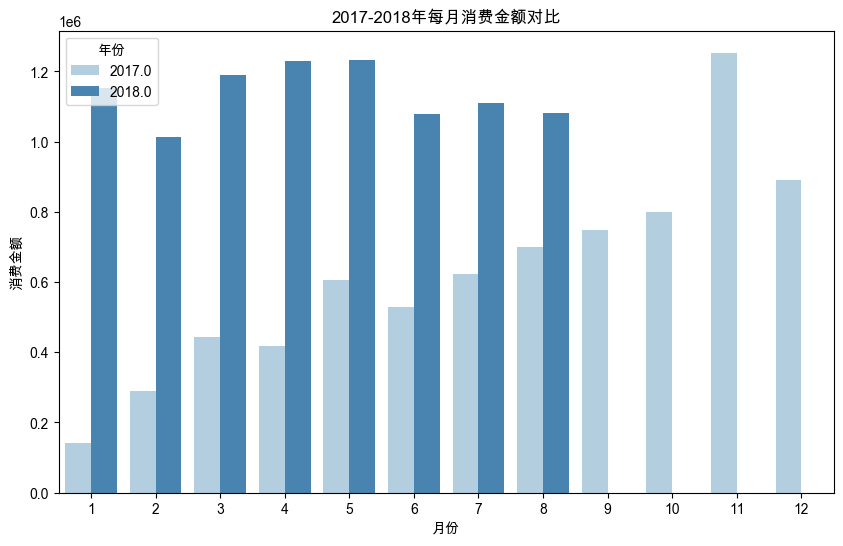

In [291]:
# 设置字体
plt.rc("font",family='Arial Unicode MS')
# 设置画布大小
plt.rcParams['figure.figsize'] = 10, 6

# 作图表示【关键参数👈】 2017-2018 年各个月份消费金额趋势，需给data参数赋值👇
sns.barplot(x='月份', y='付款金额总和', data=customers_payment_all, palette='Blues', hue='年份')
plt.xlabel('月份')      # 设置x轴标签
plt.ylabel('消费金额')  # 设置y轴标签
plt.title('2017-2018年每月消费金额对比') # 设置图片标题
plt.show()

根据每月消费金额趋势图显示，2017年平台用户消费金额不断上升，业务增长态势明显，11月份达到最高峰，消费金额为120万以上，11月11日是一年一度的购物节，双十一折扣是促进消费的重要影响因素；2018年1-8月消费金额比2017年12月高，每月消费金额均超过100万，业务规模走势相对平稳，增长幅度比去年同期小。

## Step 2 消费顾客数分析

目的：绘制 2017-2018 年各个月份的消费顾客数趋势对比图

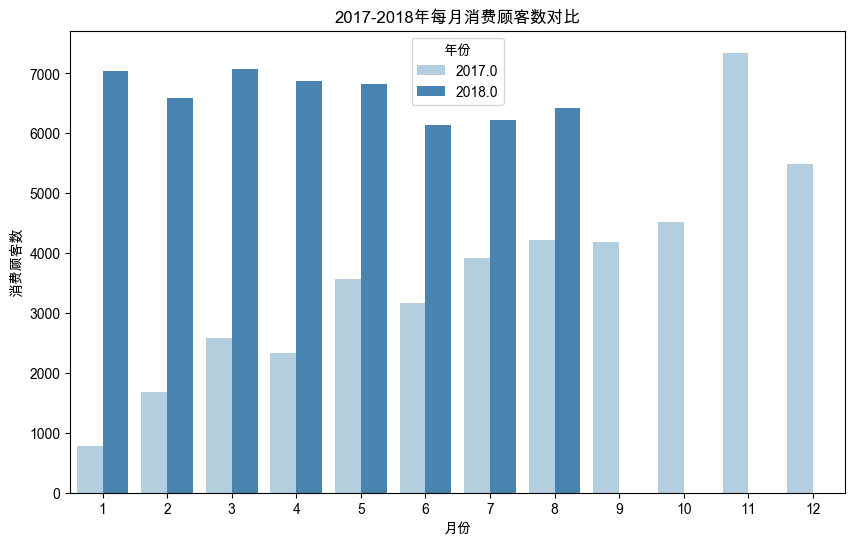

In [292]:
# 作图表示【关键参数👈】 2017-2018 年各个月份的消费用户数趋势，需给data参数赋值👇
sns.barplot(x='月份', y='顾客总数', data=customers_payment_all, palette='Blues', hue='年份')
plt.xlabel('月份')        # 设置x轴标签
plt.ylabel('消费顾客数')  # 设置y轴标签
plt.title('2017-2018年每月消费顾客数对比') # 设置图片标题
plt.show()

根据每月消费顾客数的趋势图显示，2017年平台消费顾客数不断上升，业务增长态势明显，同样11月份达到最高峰，消费顾客数将近7200人，11月11日是一年一度的购物节，双十一折扣是促进消费的重要影响因素；2018年1-8月消费顾客数的整体水平比2017年12月高，每月消费顾客数均超过6000人，业务规模走势相对平稳，增长幅度比去年同期小。

## Step 3 订单数分析

目的：绘制 2017-2018 年每月订单数趋势对比图

### 1.分组聚合得到 2017 年各个月份的订单总数：

In [293]:
# 从df中 提取 2017 年的数据，分组聚合得到每个【月份】，对【订单号】计数，保留【年份】字段,并对结果【索引重置】
orders_2017 = df[df['年份'] == 2017].groupby('月份').agg({'订单号':'count','年份':'mean'}).reset_index()
orders_2017.head(2)

,月份,订单号,年份
0,1,858,2017.0
1,2,1825,2017.0


In [294]:
# 字段重命名 【订单号】重新命名为【订单总数】
orders_2017 = orders_2017.rename(columns={'订单号':'订单总数'})
orders_2017.head(2)

,月份,订单总数,年份
0,1,858,2017.0
1,2,1825,2017.0


### 2.分组聚合得到 2018 年各个月份的订单总数：

In [295]:
# 从df中 提取 2018 年的数据，分组聚合每个【月份】，对【订单号】计数，保留【年份】字段,并对结果【索引重置】
orders_2018 = df[df['年份'] == 2018].groupby('月份').agg({'订单号':'count','年份':'mean'}).reset_index()
orders_2018

,月份,订单号,年份
0,1,7603,2018.0
1,2,6966,2018.0
2,3,7556,2018.0
3,4,7395,2018.0
4,5,7286,2018.0
5,6,6606,2018.0
6,7,6635,2018.0
7,8,6855,2018.0
8,9,1,2018.0


In [296]:
# 字段重命名 【订单号】重新命名为【订单总数】
orders_2018 = orders_2018.rename(columns={'订单号':'订单总数'})
orders_2018

,月份,订单总数,年份
0,1,7603,2018.0
1,2,6966,2018.0
2,3,7556,2018.0
3,4,7395,2018.0
4,5,7286,2018.0
5,6,6606,2018.0
6,7,6635,2018.0
7,8,6855,2018.0
8,9,1,2018.0


In [297]:
# 关键参数👈整合 2017 年和 2018 年数据
orders_all = orders_2017.append(orders_2018)
orders_all

,月份,订单总数,年份
0,1,858,2017.0
1,2,1825,2017.0
2,3,2813,2017.0
3,4,2542,2017.0
4,5,3931,2017.0
5,6,3449,2017.0
6,7,4313,2017.0
7,8,4572,2017.0
8,9,4517,2017.0
9,10,4915,2017.0


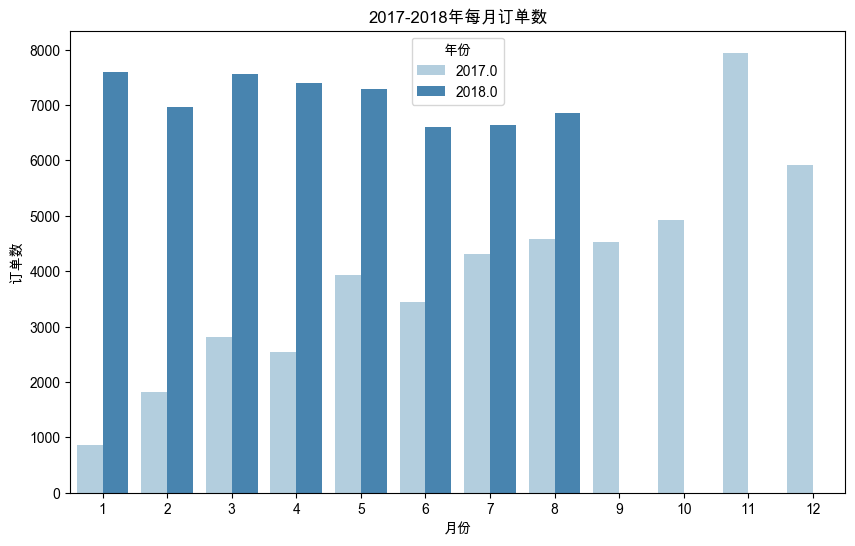

In [298]:
# 作图表示 【关键参数👈】 2017 年和 2018 年各个月份订单数趋势，需给data参数赋值👇
sns.barplot(x='月份', y='订单总数', data=orders_all, palette='Blues', hue='年份')
plt.xlabel('月份')       # 设置x轴标签
plt.ylabel('订单数')   # 设置y轴标签
plt.title('2017-2018年每月订单数')  # 设置图片标题
plt.show()

随着平台业务发展，2017年，消费订单数呈上升趋势，11月份消费订单数逼近8000笔；2018年1-8月，消费订单数高于上年年底，数目在6000-8000之间波动。

## Step 4 商品购买量分析

目的：绘制 2017-2018 年每月商品购买数趋势对比图

### 1.分组聚合得到 2017 年各个月份的商品购买总数：

In [299]:
# 从df中 提取 2017 年的数据，分组聚合每个【'月份'】【'商品ID'】，保留【年份】字段,并对结果【索引重置】
df_2017_month_product = df[df['年份'] == 2017].groupby(['月份','商品ID']).agg({'年份': 'mean'}).reset_index()
df_2017_month_product

,月份,商品ID,年份
0,1,001c5d71ac6ad696d22315953758fa04,2017.0
1,1,00be617b58175bf207fd35910d5097a4,2017.0
2,1,010a3a47c14f1295796c08419f32cef6,2017.0
3,1,014a8a503291921f7b004a5215bb3c36,2017.0
4,1,01586bfbe1d5449887f1cac4ad1fbd02,2017.0
...,...,...,...
28267,12,ffc0b406806006602c5853b00ab5f7fd,2017.0
28268,12,ffce5ed9e0bcc2e46796b988cdac733b,2017.0
28269,12,ffcfaba393e8ef71937c6e8421bc2868,2017.0
28270,12,ffd34459c21034d1da6df9800de0d7a3,2017.0


In [300]:
# 对上面结果分组聚合每个【'月份'】对【'商品ID'】计数，保留【年份】字段，并对结果进行索引重置
products_2017 = df_2017_month_product.groupby('月份').agg({'商品ID':'count','年份':'mean'}).reset_index()
products_2017

,月份,商品ID,年份
0,1,604,2017.0
1,2,1226,2017.0
2,3,1736,2017.0
3,4,1620,2017.0
4,5,2303,2017.0
5,6,1995,2017.0
6,7,2483,2017.0
7,8,2808,2017.0
8,9,2762,2017.0
9,10,2943,2017.0


In [301]:
# 字段重命名 【商品ID】重命名为【商品总数】
products_2017 = products_2017.rename(columns={'商品ID':'商品总数'})
products_2017.head(2)

,月份,商品总数,年份
0,1,604,2017.0
1,2,1226,2017.0


### 2.分组聚合得到 2018 年各个月份的商品购买总数:

In [302]:
# 从df中 提取 2018 年的数据，分组聚合每个【'月份'】【'商品ID'】，保留【年份】字段，并对结果【索引重置】
df_2018_month_product = df[df['年份'] == 2018].groupby(['月份','商品ID']).agg({'年份':'mean'}).reset_index()
df_2018_month_product

,月份,商品ID,年份
0,1,002959d7a0b0990fe2d69988affcbc80,2018.0
1,1,0043c62d00db47eff6a6bc4cf6bfaeda,2018.0
2,1,005030ef108f58b46b78116f754d8d38,2018.0
3,1,005c6b24cc96dca3e2c01e824401030e,2018.0
4,1,006baa9a5b8f95895f15273a35bc2664,2018.0
...,...,...,...
32696,8,ffc9caf33e2d1e9f44e3e06da19085f7,2018.0
32697,8,ffd4bf4306745865e5692f69bd237893,2018.0
32698,8,ffd9ac56db9194a413298faaa03cd176,2018.0
32699,8,fffdb2d0ec8d6a61f0a0a0db3f25b441,2018.0


In [303]:
# 对上面结果分组聚合每个【'月份'】对【'商品ID'】计数，保留【年份】字段，并对结果进行索引重置
products_2018 = df_2018_month_product.groupby('月份').agg({'商品ID':'count','年份':'mean'}).reset_index()
products_2018

,月份,商品ID,年份
0,1,4015,2018.0
1,2,3770,2018.0
2,3,4114,2018.0
3,4,4276,2018.0
4,5,4021,2018.0
5,6,4006,2018.0
6,7,4158,2018.0
7,8,4340,2018.0
8,9,1,2018.0


In [304]:
# 字段重命名 【商品ID】重命名为【商品总数】
products_2018 = products_2018.rename(columns={'商品ID':'商品总数'})

In [305]:
#关键参数👈 整合 2017 年和 2018 年数据
products_all = products_2017.append(products_2018)
products_all

,月份,商品总数,年份
0,1,604,2017.0
1,2,1226,2017.0
2,3,1736,2017.0
3,4,1620,2017.0
4,5,2303,2017.0
5,6,1995,2017.0
6,7,2483,2017.0
7,8,2808,2017.0
8,9,2762,2017.0
9,10,2943,2017.0


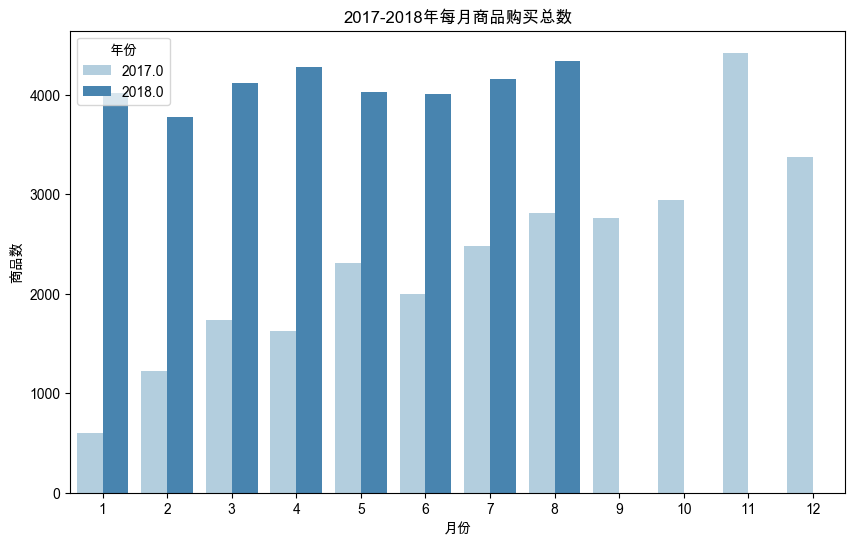

In [306]:
#  【关键参数👈】 作图表示 2017-2018 年各个月份商品购买总数，需给data参数赋值👇
sns.barplot(x='月份', y='商品总数', data=products_all, palette='Blues', hue='年份')
plt.xlabel('月份')      # 设置x轴标签
plt.ylabel('商品数')  # 设置y轴标签
plt.title('2017-2018年每月商品购买总数')  # 设置图片标题
plt.show()

随着平台业务发展，2017年，产品购买量呈上升趋势，11月份产品购买量突破4000件；2018年1-8月，消费订单数和产品购买量均高于上年年底，数目在3000-5000之间波动。

# Part 3 顾客个体消费分析

> 主要针对顾客消费行为进行分析，找出顾客消费规律。

1. 顾客消费金额及每月平均消费金额
2. 顾客购买商品数目分析
3. 每月订单平均消费金额分析

## Step 1 顾客消费金额及每月平均消费金额分析

### 1. 顾客消费金额分析：

In [307]:
# 【关键参数👈】分组聚合每个【顾客ID】，并对提取列名【付款金额】进行求和，对结果进行【索引重置】
df_customer_payment = df.groupby('顾客ID')['付款金额'].sum().reset_index()
df_customer_payment.head(2)

,顾客ID,付款金额
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41


In [308]:
# 顾客消费金额描述性统计
df_customer_payment['付款金额'].describe()

count    97255.000000
mean       170.606202
std        257.272313
min          6.150000
25%         62.050000
50%        106.230000
75%        182.980000
max      15978.650000
Name: 付款金额, dtype: float64

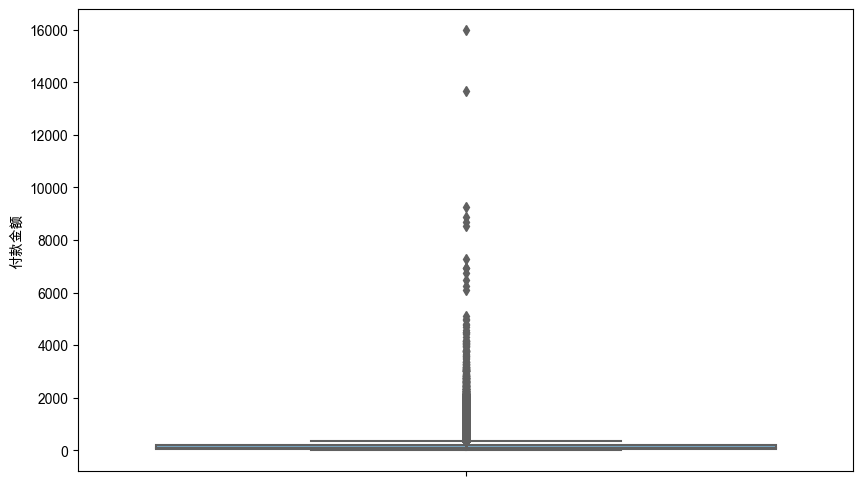

In [309]:
# 【关键参数👈】 绘制顾客消费金额箱图,需给data参数赋值👇
sns.boxplot(y="付款金额", data=df_customer_payment, palette='Blues')
plt.show()

**顾客消费金额呈明显的右长尾分布。**

### 分离正常值与异常值，使用 1.5 IQR 规则：

In [310]:
# 【关键参数👈】 计算 IQR *参考课程代码
Q1 = df_customer_payment['付款金额'].quantile(0.25)
Q3 = df_customer_payment['付款金额'].quantile(0.75)
IQR = Q3 - Q1
IQR

120.92999999999999

In [311]:
# 【关键参数👈】分离出正常值，*参考课程代码
df_box_normal = df_customer_payment[(df_customer_payment['付款金额'] > Q1 - 1.5 * IQR ) & (df_customer_payment['付款金额'] < Q3 + 1.5 * IQR)]['付款金额']
df_box_normal

0        114.74
1         67.41
2        195.42
3        179.35
4        107.01
          ...  
97250     91.91
97251     81.36
97252     63.13
97253    214.13
97254     45.50
Name: 付款金额, Length: 88893, dtype: float64

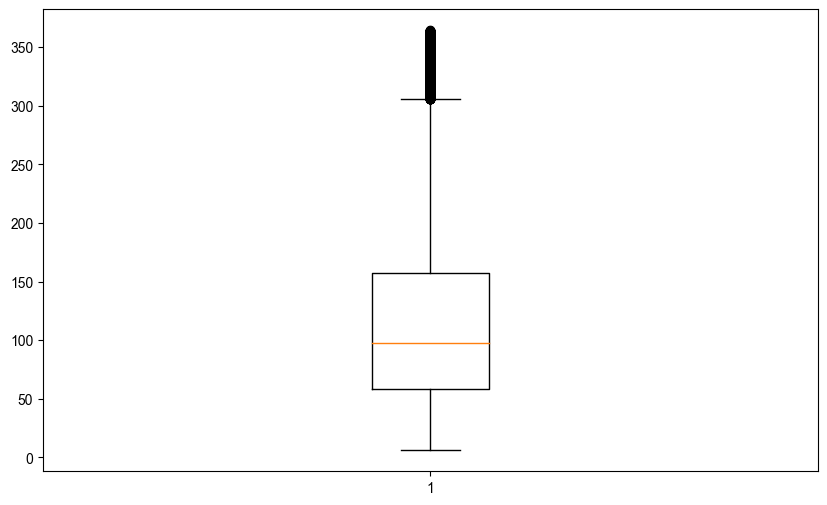

In [312]:
# 【关键参数👈】 画出正常值的分布图,👇需要补充参数
plt.boxplot(df_box_normal)
plt.show()

In [313]:
df_box_normal.describe()

count    88893.000000
mean       116.902960
std         75.460158
min          6.150000
25%         58.480000
50%         97.350000
75%        157.450000
max        364.340000
Name: 付款金额, dtype: float64

**从正常值的分布图中可以看出，绝大多数用户的消费金额小于 160，大部分用户集中于较低的消费档次。**

In [314]:
# 计算异常值占整体的比例 
outlier_ratio = (len(df_customer_payment) - len(df_box_normal))/len(df_customer_payment)*100
outlier_ratio

8.598015526194027

**存在少数金额偏高的消费用户，仅占不到9%。**

### 2.每月顾客平均消费金额分析：

In [315]:
# 计算 2017 年每个月中，平均每个顾客的消费金额 
customers_payment_2017['avg_payment'] = (customers_payment_2017['付款金额总和']/customers_payment_2017['顾客总数'])
customers_payment_2017.head(2)

,月份,顾客总数,付款金额总和,年份,avg_payment
0,1,778,142637.61,2017.0,183.338830
1,2,1681,290368.21,2017.0,172.735402


In [316]:
# 计算结果保留 2 位小数
customers_payment_2017['avg_payment'] = customers_payment_2017['avg_payment'].round(2)
customers_payment_2017.head(2)

,月份,顾客总数,付款金额总和,年份,avg_payment
0,1,778,142637.61,2017.0,183.34
1,2,1681,290368.21,2017.0,172.74


In [317]:
# 计算 2018 年每个月中，平均每个顾客的消费金额
customers_payment_2018['avg_payment'] = (customers_payment_2018['付款金额总和']/customers_payment_2018['顾客总数'])
customers_payment_2018

,月份,顾客总数,付款金额总和,年份,avg_payment
0,1,7039,1153357.23,2018.0,163.852426
1,2,6586,1014437.97,2018.0,154.029452
2,3,7067,1190114.16,2018.0,168.404438
3,4,6865,1229113.62,2018.0,179.040586
4,5,6817,1231470.67,2018.0,180.647010
5,6,6139,1079523.45,2018.0,175.846791
6,7,6226,1108785.07,2018.0,178.089475
7,8,6418,1080538.30,2018.0,168.360595
8,9,1,166.46,2018.0,166.460000


In [318]:
# 计算结果保留 2 位小数
customers_payment_2018['avg_payment'] = customers_payment_2018['avg_payment'].round(2)

In [319]:
# 【关键参数👈】整合 2017 年和 2018 年数据，并对结果进行【索引重置】
customers_payment_avg_all = customers_payment_2017.append(customers_payment_2018)
customers_payment_avg_all

,月份,顾客总数,付款金额总和,年份,avg_payment
0,1,778,142637.61,2017.0,183.34
1,2,1681,290368.21,2017.0,172.74
2,3,2589,444137.58,2017.0,171.55
3,4,2327,417652.67,2017.0,179.48
4,5,3576,605651.52,2017.0,169.37
5,6,3162,529559.96,2017.0,167.48
6,7,3918,623040.79,2017.0,159.02
7,8,4227,700341.17,2017.0,165.68
8,9,4183,747830.63,2017.0,178.78
9,10,4513,798755.43,2017.0,176.99


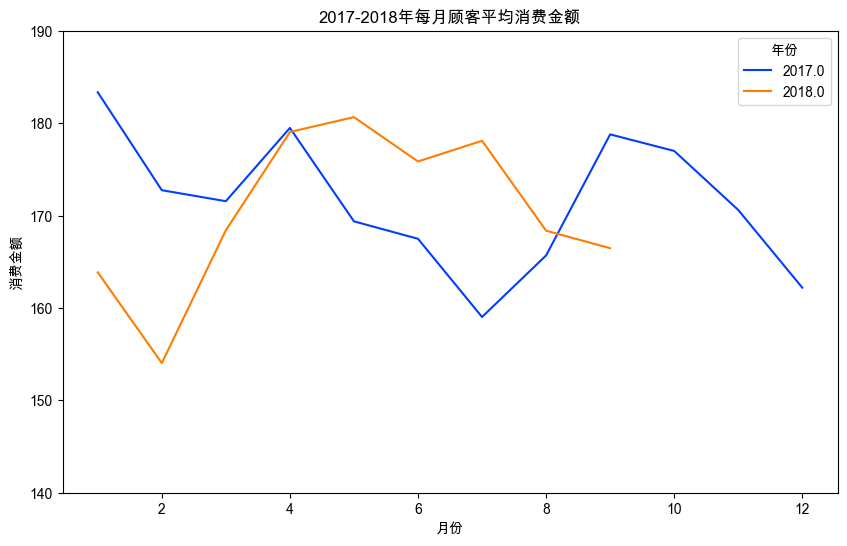

In [320]:
# 作图 【关键参数👈】 表示 2017-2018 年各个月份顾客平均消费金额，需对data赋值👇
sns.lineplot(x='月份', y='avg_payment',data=customers_payment_avg_all, hue='年份', palette='bright')
plt.ylim(140,190)
plt.xlabel('月份')      # 设置x轴标签
plt.ylabel('消费金额')  # 设置y轴标签
plt.title('2017-2018年每月顾客平均消费金额')  # 设置图片标题
plt.show()

每月顾客平均消费金额（客单价） = 每月消费金额 / 每月消费顾客数，平台每月顾客平均消费金额在 150-190 之间，平台保持规模发展的同时需提高顾客人均消费水平，狠抓高质量用户。

## Step 2 顾客购买商品数分析

目的：绘制顾客每单购买商品数的分布图

In [321]:
# 分组聚合得到每个【订单号】的【商品ID】，并对结果进行【索引重置】
df_order_product = df.groupby(['订单号'])['商品ID'].count().reset_index()
df_order_product.head(2)

,订单号,商品ID
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1


In [322]:
# 对上述结果，字段重命名，将【商品ID】重名为【商品数】
df_order_product = df_order_product.rename(columns={
    '商品ID': '商品数'
})
df_order_product

,订单号,商品数
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
97250,fffc94f6ce00a00581880bf54a75a037,1
97251,fffcd46ef2263f404302a634eb57f7eb,1
97252,fffce4705a9662cd70adb13d4a31832d,1
97253,fffe18544ffabc95dfada21779c9644f,1


In [323]:
# 对上述结果分组聚合得到各个【商品数】并对提取列名【订单号】进行计数
df_product_order = df_order_product.groupby('商品数')['订单号'].count()
df_product_order.head(2)

商品数
1    91304
2     5095
Name: 订单号, dtype: int64

In [324]:
# 由上述结果中的订单数目，计算出占所有订单数的百分比数字
df_product_order_ratio = df_product_order/len(df_order_product)*100
df_product_order_ratio.head(2)

商品数
1    93.881034
2     5.238805
Name: 订单号, dtype: float64

In [325]:
# 将上述计算结果保留两位小数
products_dist = df_product_order_ratio.round(2).to_frame()
products_dist

,订单号
商品数,
1,93.88
2,5.24
3,0.55
4,0.21
5,0.02
6,0.04
7,0.02
8,0.01
9,0.01


In [326]:
# 对结果进行【索引重置】
products_dist = products_dist.reset_index()
products_dist

,商品数,订单号
0,1,93.88
1,2,5.24
2,3,0.55
3,4,0.21
4,5,0.02
5,6,0.04
6,7,0.02
7,8,0.01
8,9,0.01
9,10,0.00


In [327]:
# 对上述结果，字段重命名，将【订单号】重命名为【订单数占比】
products_dist = products_dist.rename(columns={'订单号':'订单数占比'})

In [328]:
# 【关键参数👉】查看结果
products_dist

,商品数,订单数占比
0,1,93.88
1,2,5.24
2,3,0.55
3,4,0.21
4,5,0.02
5,6,0.04
6,7,0.02
7,8,0.01
8,9,0.01
9,10,0.00


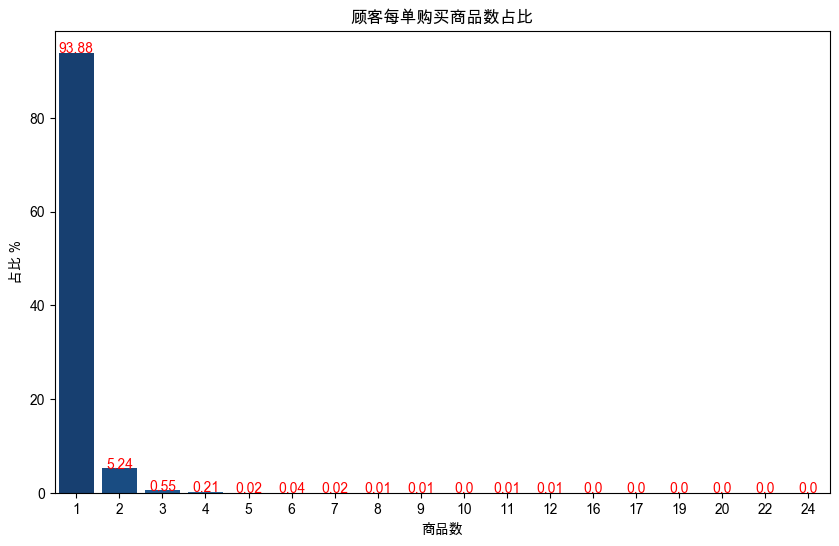

In [329]:
# 【关键参数👉】作图显示顾客购买【订单数占比】，需对data赋值👇
g = sns.barplot(x='商品数', y='订单数占比', data=products_dist, palette='Blues_r')

# 柱状图上显示刻度，products_dist为本功能模块预设的上个单元格变量
for index, row in products_dist.iterrows():
    g.text(row.name, row['订单数占比'], round(row['订单数占比'],2), color='red', ha="center")

plt.xlabel('商品数') # 设置x轴标签
plt.ylabel('占比 %') # 设置y轴标签
plt.title('顾客每单购买商品数占比') # 设置图片标题
plt.show()

由顾客每单购买商品数分布图可知，93.88% 的顾客订单中只包含一件商品，包含两件商品的顾客订单数占比 5.24%，包含五件及以上商品的顾客订单数仅占 0.55%，顾客消费单一。

## Step 3 每月订单平均消费金额分析

### 1.分组聚合得到 2017 年各个月份的订单平均消费金额：

In [330]:
# 从df中 提取出 2017 年的数据，分组聚合【月份】【订单号】，对【付款金额】的请求，保留【年份】字段，并对结果【索引重置】
df_month_order_sales_2017 = df[df['年份']==2017].groupby(['月份','订单号']).agg({'付款金额':'sum', '年份':'mean'}).reset_index()
df_month_order_sales_2017.head(2)

,月份,订单号,付款金额,年份
0,1,001dbc16dc51075e987543d23a0507c7,87.90,2017.0
1,1,00b4a910f64f24dbcac04fe54088a443,50.59,2017.0


In [331]:
# 对上述结果分组聚合【月份】对【订单号】计数，【付款金额】求和，保留【年份】字段，并对结果【索引重置】
orders_purchased_2017 = df_month_order_sales_2017.groupby('月份').agg({'订单号':'count','付款金额':'sum', '年份':'mean'}).reset_index()
orders_purchased_2017

,月份,订单号,付款金额,年份
0,1,778,142637.61,2017.0
1,2,1681,290368.21,2017.0
2,3,2589,444137.58,2017.0
3,4,2327,417652.67,2017.0
4,5,3576,605651.52,2017.0
5,6,3162,529559.96,2017.0
6,7,3918,623040.79,2017.0
7,8,4227,700341.17,2017.0
8,9,4183,747830.63,2017.0
9,10,4513,798755.43,2017.0


In [332]:
# 字段重命名，将【订单号】重命名为【订单总数】，将【付款金额】重命名为【付款金额总和】
orders_purchased_2017 = orders_purchased_2017.rename(columns={'订单号':'订单总数', '付款金额':'付款金额总和'})
orders_purchased_2017

,月份,订单总数,付款金额总和,年份
0,1,778,142637.61,2017.0
1,2,1681,290368.21,2017.0
2,3,2589,444137.58,2017.0
3,4,2327,417652.67,2017.0
4,5,3576,605651.52,2017.0
5,6,3162,529559.96,2017.0
6,7,3918,623040.79,2017.0
7,8,4227,700341.17,2017.0
8,9,4183,747830.63,2017.0
9,10,4513,798755.43,2017.0


In [333]:
# 计算每个月中订单的**平均付款金额**，结果保留两位小数
orders_purchased_2017['avg_order_payment'] = (orders_purchased_2017['付款金额总和']/orders_purchased_2017['订单总数']).round(2)
orders_purchased_2017.head(2)

,月份,订单总数,付款金额总和,年份,avg_order_payment
0,1,778,142637.61,2017.0,183.34
1,2,1681,290368.21,2017.0,172.74


### 2.分组聚合得到 2018 年各个月份的订单平均消费金额：

In [334]:
# 从df中 提取出 2018 年的数据，分组聚合得到【每个月】【每个订单】的付款金额的【总和】，并保留年份,并对结果【索引重置】
df_month_order_sales_2018 = df[df['年份']==2018].groupby(['月份','订单号']).agg({'付款金额':'sum', '年份':'mean'}).reset_index()
df_month_order_sales_2018.head(2)


,月份,订单号,付款金额,年份
0,1,000229ec398224ef6ca0657da4fc703e,216.87,2018.0
1,1,0011d82c4b53e22e84023405fb467e57,315.33,2018.0


In [335]:
# 对上述结果分组聚合得到【每个月】的【订单数】，【付款金额的总和】，保留年份，并对结果进行【索引重置】
orders_purchased_2018 = df_month_order_sales_2018.groupby('月份').agg({'订单号':'count','付款金额':'sum', '年份':'mean'}).reset_index()
orders_purchased_2018.head(2)


,月份,订单号,付款金额,年份
0,1,7039,1153357.23,2018.0
1,2,6586,1014437.97,2018.0


In [336]:
# 字段重命名，将【订单号】重命名为【订单总数】，将【付款金额】重命名为【付款金额总和】
orders_purchased_2018 = orders_purchased_2018.rename(columns={'订单号':'订单总数', '付款金额':'付款金额总和'})
orders_purchased_2018.head(2)

,月份,订单总数,付款金额总和,年份
0,1,7039,1153357.23,2018.0
1,2,6586,1014437.97,2018.0


In [337]:
# 计算每个月中订单的【平均付款金额】，结果保留两位小数
orders_purchased_2018['avg_order_payment'] = (orders_purchased_2018['付款金额总和']/orders_purchased_2018['订单总数']).round(2)
orders_purchased_2018.head(2)

,月份,订单总数,付款金额总和,年份,avg_order_payment
0,1,7039,1153357.23,2018.0,163.85
1,2,6586,1014437.97,2018.0,154.03


In [338]:
# 【关键参数👉】整合 2017 年和 2018 年数据，并重置索引
orders_purchased_all = orders_purchased_2017.append(orders_purchased_2018)
orders_purchased_all.head(2)

,月份,订单总数,付款金额总和,年份,avg_order_payment
0,1,778,142637.61,2017.0,183.34
1,2,1681,290368.21,2017.0,172.74


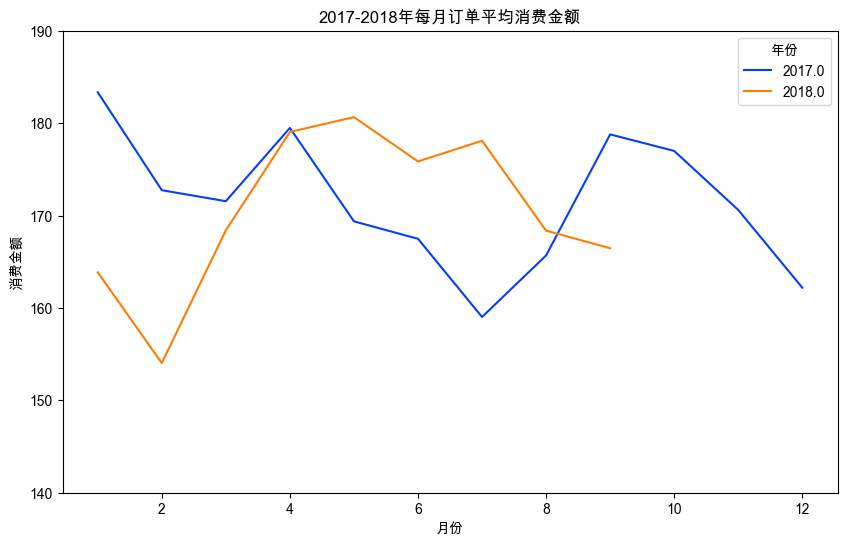

In [339]:
# 【关键参数👉】作图表示 2017-2018 年各个月份订单平均消费金额，需对data赋值👇
sns.lineplot(x='月份', y='avg_order_payment',data=orders_purchased_all, hue='年份', palette='bright')
plt.ylim(140,190)
plt.xlabel('月份')      # 设置x轴标签
plt.ylabel('消费金额')  # 设置y轴标签
plt.title('2017-2018年每月订单平均消费金额')  # 设置图片标题
plt.show()

每月订单平均消费金额 = 每月消费金额 / 每月订单数，平台每月订单平均消费金额在 150-185 之间，平台保持规模发展的同时需提高订单平均金额。

# Part 4 RFM客户分群

> 通过RFM用户分群分析，对不同用户群体进行精细化运营，重要价值用户是需要重点维护的优质用户，可为他们提供更优质的会员、反馈服务等；对于较长时间没有消费的重要保持用户需积极唤回，促使其保持消费；重要发展用户具备发展潜力，需不断引导，重点培养，提高忠诚度；重要挽留用户同样需要加强唤回策略，刺激消费，减少流失。

1. R、F、M三个指标的计算
2. 对 R、F、M的值进行打分
3. 对客户进行分群并用饼图显示占比

## Step 1 R、F、M 各个指标的计算

In [340]:
# 设置当前日期为最后一次交易日期
today = df['订单时间'].max()

# 自定义函数 convert_to_days 用来计算日期间隔
def convert_to_days(date):
    time_delta = today - date.max()
    return time_delta.days

In [341]:
df.head(2)

,订单号,顾客ID,订单时间,付款金额,商品ID,商品描述,年份,月份,星期几
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,18.12,87285b34884572647811a353c7ac498a,housewares,2017,10,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,2.00,87285b34884572647811a353c7ac498a,housewares,2017,10,0


In [342]:
# 分组聚合得到每个【顾客ID】的 R、F、M 三个指标的数据
df_rfm = df.groupby('顾客ID').agg({'订单时间': convert_to_days, '订单号': 'count', '付款金额': 'sum'})
df_rfm.head(2)

,订单时间,订单号,付款金额
顾客ID,,,
00012a2ce6f8dcda20d059ce98491703,292,1,114.74
000161a058600d5901f007fab4c27140,413,1,67.41


In [343]:
# 对上面的结果进行索引重置，不需要顾客ID,.reset_index(drop=True)
df_rfm = df_rfm.reset_index(drop=True)
df_rfm.head(2)

,订单时间,订单号,付款金额
0,292,1,114.74
1,413,1,67.41


In [344]:
# 字段重命名，将订单时间命名为'R'，订单号命名为'F',付款金额为'M'
df_rfm = df_rfm.rename(columns={'订单时间': 'R', '订单号': 'F', '付款金额': 'M'})
df_rfm.head(2)

,R,F,M
0,292,1,114.74
1,413,1,67.41


## Step 2 分别对 R、F、M 三个指标进行分组并打分

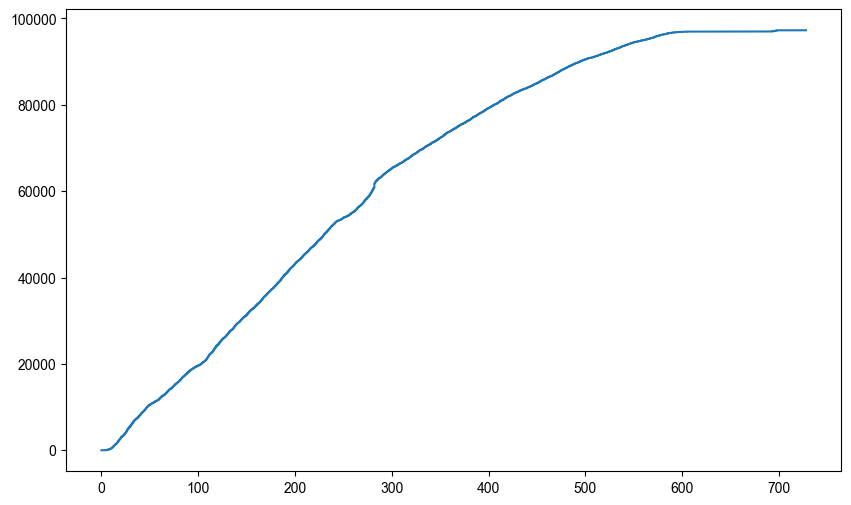

In [345]:
# 画 R 值折线图，便于后续对数据进行分组
x = df_rfm['R'].sort_values()
y = df_rfm.index

plt.plot(x, y)
plt.show()

In [346]:
 # 计算 R 值评分，拐点在 600 左右，600 以上是一个级别，600 以下平均分成四份
def calculate_R_score(r):
    if r <= 150:
        return 5
    elif r <= 300:
        return 4
    elif r <= 450:
        return 3
    elif r <= 600:
        return 2
    else:
        return 1

df_rfm['R评分'] = df_rfm['R'].agg(calculate_R_score)

In [347]:
df_rfm.head(2)

,R,F,M,R评分
0,292,1,114.74,4
1,413,1,67.41,3


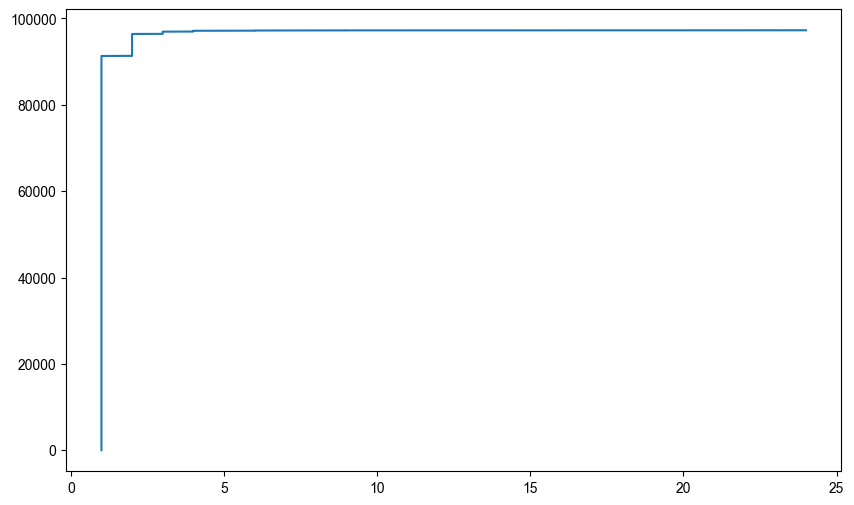

In [348]:
# 画 F 值折线图，便于后续对数据进行分组
x = df_rfm['F'].sort_values()
y = df_rfm.index

plt.plot(x, y)
plt.show()

In [349]:
 # 计算 F 值评分，拐点在 4，所以 4 以上是一个级别，4 以下平均分成四份
def calculate_F_score(r):
    if r <= 1:
        return 1
    elif r <= 2:
        return 2
    elif r <= 3:
        return 3
    elif r <= 4:
        return 4
    else:
        return 5

df_rfm['F评分'] = df_rfm['R'].agg(calculate_R_score)

In [350]:
df_rfm.head(2)

,R,F,M,R评分,F评分
0,292,1,114.74,4,4
1,413,1,67.41,3,3


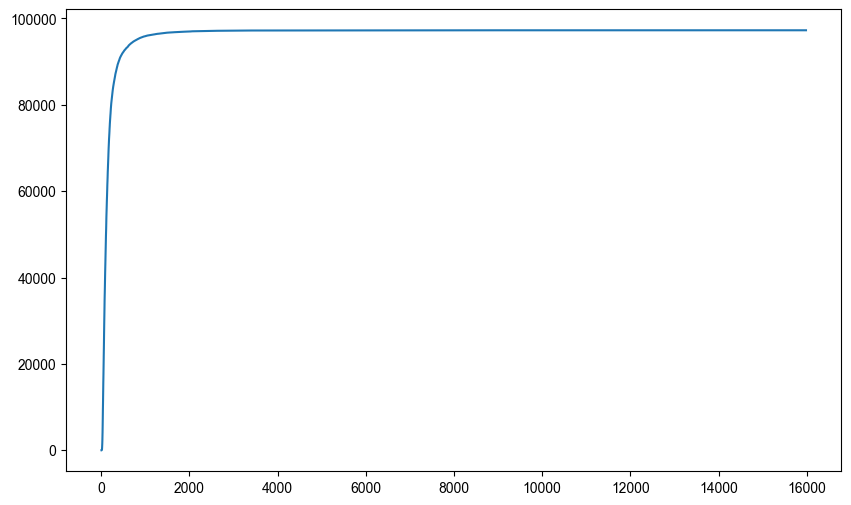

In [351]:
# 画 M 值折线图，便于后续对数据进行分组
x = df_rfm['M'].sort_values()
y = df_rfm.index

plt.plot(x, y)
plt.show()

In [352]:
# M 的拐点不容易观察，可以打印出 20%，40%，60%，80% 分位的分界点，这样可以使五个区间的人数基本平均
print('第一个分界点是：{}'.format(df_rfm['M'].quantile(0.2)))
print('第二个分界点是：{}'.format(df_rfm['M'].quantile(0.4)))
print('第三个分界点是：{}'.format(df_rfm['M'].quantile(0.6)))
print('第四个分界点是：{}'.format(df_rfm['M'].quantile(0.8)))

第一个分界点是：54.45599999999999
第二个分界点是：86.02
第三个分界点是：130.84
第四个分界点是：210.73199999999997


In [353]:
# 计算 M 值评分，根据上面打印的四个分界点，将区间分成五份
def calculate_M_score(m):
    if m <= 54:
        return 1
    elif m <= 86:
        return 2
    elif m <= 130:
        return 3
    elif m <= 210:
        return 4
    else:
        return 5

df_rfm['M评分'] = df_rfm['M'].agg(calculate_M_score)

In [354]:
df_rfm.head(2)

,R,F,M,R评分,F评分,M评分
0,292,1,114.74,4,4,3
1,413,1,67.41,3,3,2


In [355]:
# 分别求出R评分、F评分、M评分的平均值，代码需补充
r_avg = df_rfm['R评分'].mean()
f_avg = df_rfm['F评分'].mean()
m_avg = df_rfm['M评分'].mean()

print('R评分的平均值是：{}\n'.format(r_avg))
print('F评分的平均值是：{}\n'.format(f_avg))
print('M评分的平均值是：{}\n'.format(m_avg))

R评分的平均值是：3.866094288211403

F评分的平均值是：3.866094288211403

M评分的平均值是：3.0070022106832552



In [356]:
# 将 df_rfm 中的'R评分'，'F评分'，和'M评分'的数值与相应的平均值比较
# 每个评分大于相应的平均值，则标记为‘1’，对应的价值是‘高’，否则标记为‘0’，对应的价值是‘低’
df_rfm['R评分'] = (df_rfm['R评分'] > r_avg)*1
df_rfm['F评分'] = (df_rfm['F评分'] > f_avg)*1
df_rfm['M评分'] = (df_rfm['M评分'] > m_avg)*1

In [357]:
# 得到 R、F、M 三个指标得分高低值
df_rfm.head(10)

,R,F,M,R评分,F评分,M评分
0,292,1,114.74,1,1,0
1,413,1,67.41,0,0,0
2,551,1,195.42,0,0,1
3,382,1,179.35,0,0,1
4,153,1,107.01,1,1,0
5,509,1,71.80,0,0,0
6,184,1,49.40,1,1,0
7,258,1,166.59,1,1,1
8,350,1,85.23,0,0,0
9,22,1,1255.71,1,1,1


In [358]:
# 拼接R评分、F评分、M评分
score = df_rfm['R评分'].astype(str) + df_rfm['F评分'].astype(str) + df_rfm['M评分'].astype(str)
score.head(10)

0    110
1    000
2    001
3    001
4    110
5    000
6    110
7    111
8    000
9    111
dtype: object

## Step 3 对顾客进行分群并作图

In [359]:
# 将得分高低值转换为文字表达形式，👇知识课中有类似代码模板
transform_label = {
    '111':'重要价值用户',
    '101':'重要发展用户',
    '011':'重要保持用户',
    '001':'重要挽留用户',
    '110':'一般价值用户',
    '100':'一般发展用户',
    '010':'一般保持用户',
    '000':'一般挽留用户'
}
# 将 RFM 评分替换成具体的顾客类型
df_rfm['顾客类型'] = score.replace(transform_label)
df_rfm

,R,F,M,R评分,F评分,M评分,顾客类型
0,292,1,114.74,1,1,0,一般价值用户
1,413,1,67.41,0,0,0,一般挽留用户
2,551,1,195.42,0,0,1,重要挽留用户
3,382,1,179.35,0,0,1,重要挽留用户
4,153,1,107.01,1,1,0,一般价值用户
...,...,...,...,...,...,...,...
97250,170,1,91.91,1,1,0,一般价值用户
97251,157,3,81.36,1,1,0,一般价值用户
97252,103,1,63.13,1,1,0,一般价值用户
97253,81,1,214.13,1,1,1,重要价值用户


In [360]:
# 分组聚合得到每个类型的顾客数，以'顾客类型'分组，对其中一个字段计数就可以得到每个顾客类别的人数 👇知识课中有类似代码模板
df_classes_count = df_rfm.groupby('顾客类型')['R'].count().reset_index()
df_classes_count

,顾客类型,R
0,一般价值用户,38854
1,一般挽留用户,19266
2,重要价值用户,26505
3,重要挽留用户,12630


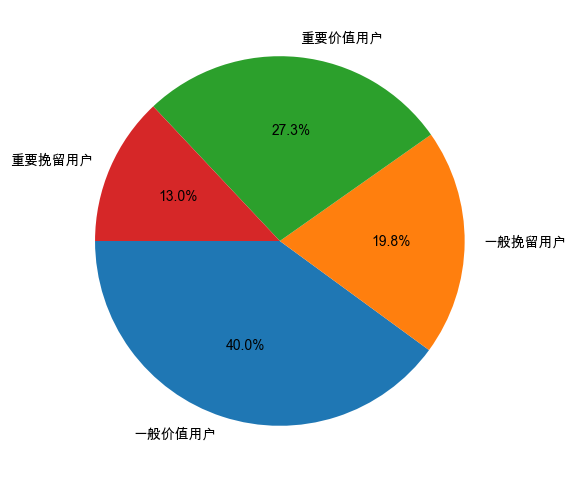

In [361]:
# 绘制饼图，数据为每一类顾客类型所对应的人数，标签为每一类的顾客类型，保留小数点后一位
# startangle 是指饼图起点的旋转角度
plt.pie(x=df_classes_count['R'], labels=df_classes_count['顾客类型'], autopct='%.1f%%', startangle=180)
plt.show()

# 结论和建议

综合上文分析，对京东电子商务平台的用户消费行为特点进行总结：
1. 用户消费订单金额集中在较低金额水平，单笔订单大部分仅购买一件产品
2. 平台消费用户具有低频小额消费的特点，用户消费单一，忠诚度低
3. 重要价值用户消费能力高、忠诚度高，是实现精细化运营策略的优质目标群体，应该提高用户向这部分用户的转化。

根据业务发展情况和用户消费行为特点，提出以下建议：
1. 从用户消费的角度来看：结合用户互动行为和访问信息，发掘潜在用户需求，适时推送产品内容、优惠信息，促使用户首次消费。根据快销品的消耗周期，及时触发用户二次购买，根据用户购买路径，智能推荐关联产品组合，激发需求，引导用户二次消费，培养用户消费习惯。促销是用户消费的重要影响因素，通过折扣价、优惠券、买赠、换购等方式拉动用户消费、增量购买、交叉购买，提高客单价。
2. 从用户运营的角度来看：根据用户分群结构，识别高价值用户特征，获取高潜力、高消费意愿的用户是运营的重心，平台制定用户精细化运营策略时需衡量成本与效益。重要价值用户是需要重点维护的优质用户，通过提供积分礼品、会员优惠、增值服务等方式，提升用户满意度。根据高价值用户特征，挖掘高消费潜力的用户，重点营销和培养，提高用户忠诚度。对于用户流失和挽留，需衡量用户价值和挽留成本。